# Under the hood of a k-means clustering algorithm
by **Bradley Aldous**

## Contents:

* [Section 1: Preparing two test datasets](#first-bullet)
* [Section 2: Applying k-means clustering on paper](#second-bullet)
* [Section 3: Creating a test harness](#third-bullet)
* [Section 4: Implementing k-means clustering in Python](#fourth-bullet)
* [Section 5: Visualising the results](#fifth-bullet)

## Section 1: Preparing two test datasets <a class="anchor" id="first-bullet"></a>

In this section I prepare two test datasets, one small and another larger one. I then demonstrate why the smaller dataset is a suitable one to perform k-means clustering on, which is done without the aid of a computer in section 2. Below is the preamble containing all the libraries and packages that are used in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import style
from matplotlib.pyplot import figure
style.use('grayscale')
plt.rcParams["figure.figsize"] = (10, 10)

Here is a small two-dimensional dataset that fits roughly into three clusters, allowing me to apply my k-means clustering algorithm on paper. A plot of this data can be found is shown below.

In [2]:
X = np.array([[1, 2],
              [2, 4],
              [9, 4],
              [7, 5],
              [4, 8],
              [5, 11]])
X

array([[ 1,  2],
       [ 2,  4],
       [ 9,  4],
       [ 7,  5],
       [ 4,  8],
       [ 5, 11]])

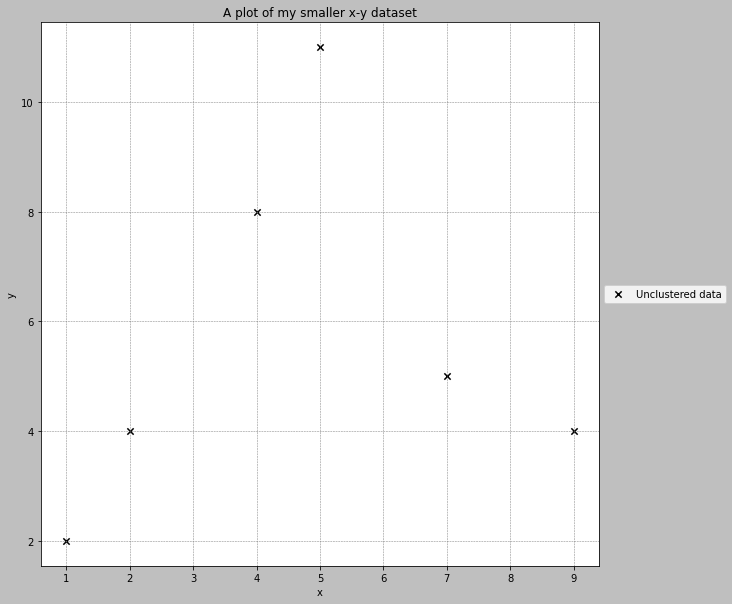

In [3]:
plt.scatter(X[:,0], X[:,1], s = 40, marker = 'x', label = 'Unclustered data')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('x')
plt.ylabel('y')
plt.title('A plot of my smaller x-y dataset')
plt.show()

To demonstrate that this dataset is suitable for k-means clustering, I have created a function to perform the elbow method on my dataset to show the optimal value for k. The elbow method is a heuristic used in determining the number of clusters in a data set.

In [4]:
def RangeK(data):
    if len(data) < 10:
        return len(data)
    else:
        return 10

def ElbowMethod(data):
    distortions = []
    K = range(1, RangeK(data))
    for k in K:
        kmeans2 = KMeans(n_clusters = k)
        kmeans2.fit(data)
        distortions.append(kmeans2.inertia_)
    
    plt.figure(figsize=(10,10))
    plt.plot(K, distortions, 'bx-')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('A plot of the Elbow Method showing the optimal k')
    plt.show()

Applying this function to my small dataset gives us the following plot.

C:\Users\Brudalaxe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


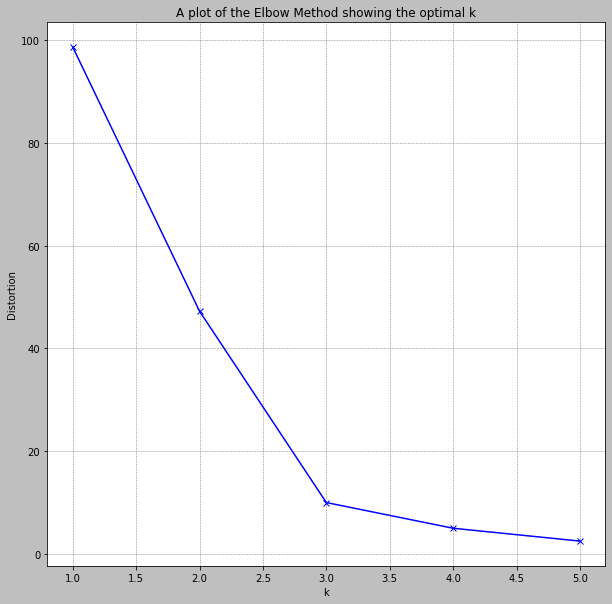

In [5]:
ElbowMethod(X)

It is quite obviously seen that three clusters is the optimal amount for this dataset as the elbow (the point after which the points follow a linear decrease) is at k = 3. The elbow is also very sharp, implying that three clusters is very suitable for this data.

Here is a larger two-dimensional dataset that I've created using NumPy's random package. This dataset is comparable in size to the Iris dataset. A plot of this data can be found in section 5.

In [6]:
x2 = np.random.randint(low = 1, size = 600, high = 100)
y2 = np.random.randint(low = 1, size = 600, high = 100)
data = np.column_stack((x2, y2))
data

array([[59,  2],
       [36,  5],
       [ 4, 62],
       ...,
       [70, 53],
       [55, 96],
       [30, 62]])

## Section 2: Applying k-means clustering on paper <a class="anchor" id="second-bullet"></a>

In this section I apply k-means clustering on the small dataset created in Part 1. I then perform it computationally using sklearn's kmeans package to verify my results.

Below are the basic steps to performing k=means clustering on some data.

1. Randomly select centroids
2. Calculate Euclidean distance of each point from centroids
3. Assign each point to a specific centroid cluster based on smallest distance
4. Calculate new cluster centroids
5. Repeat steps 2-4 until convergence

**Step 1**: I have randomly chosen the following three initial centroids: $(4,7),(2,7),(7,9)$. These points all lie within the range of values that my data covers (x-values between 1 and 9, and y-values between 2 and 11).

**Step 2**: The table below shows the results of calculating the Euclidean distance of each data point from the three centroids using the following equation:

<center>$d(p,q) = \sqrt{(q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2}}$</center>

where $p$ has coordinares $(p_{1},p_{2})$ and $q$ has coordinates $(q_{1},q_{2})$.

|Data |Centroid 1 (4,7) |Centroid 2 (2,7) |Centroid 3 (7,9) |
|--- |---- |---- |---- |
|(1,2) |5.83 |5.10 |9.22 |
|(2,4) |3.61 |3 |7.07 |
|(9,4) |5 |7.62 |5.39 |
|(7,5) |3.61 |5.39 |4 |
|(4,8) |1 |2.24 |3.16 |
|(5,11) |4.12 |5 |2.83 |

**Step 3**: Assigning each data point a cluster, determined by which centroid the point is closest to, results in the following:

|Data |Centroid 1 (4,7) |Centroid 2 (2,7) |Centroid 3 (7,9) | Cluster |
|--- |---- |---- |---- |------ | 
|(1,2) |5.83 |5.10 |9.22 |2 |
|(2,4) |3.61 |3 |7.07 |2 |
|(9,4) |5 |7.62 |5.39 |1 |
|(7,5) |3.61 |5.39 |4 |1 |
|(4,8) |1 |2.24 |3.16 |1 |
|(5,11) |4.12 |5 |2.83 |3 |

**Step 4**: Calculating the new cluster centroids:

Cluster 1 centroid $ = (\frac{9+7+4}{3},\frac{4+5+8}{3}) = (\frac{20}{3},\frac{17}{3}) $

Cluster 2 centroid $ = (\frac{1+2}{2},\frac{2+4}{2}) = (1.5,3) $

Cluster 1 centroid $ = (5,11) $

**Step 5**: Repeating once gives:

|Data |Centroid 1 (20/3,17/3) |Centroid 2 (1.5,3) |Centroid 3 (5,11) | Cluster |
|--- |---- |---- |---- |------ | 
|(1,2) |6.75 |1.12 |9.85 |2 |
|(2,4) |4.96 |1.12 |7.62 |2 |
|(9,4) |2.87 |7.57 |8.06 |1 |
|(7,5) |0.75 |5.85 |6.32 |1 |
|(4,8) |3.54 |5.59 |3.16 |3 |
|(5,11) |5.59 |8.73 |0 |3 |

Cluster 1 centroid $ = (\frac{9+7}{2},\frac{4+5}{2}) = (8,4.5) $

Cluster 2 centroid $ = (\frac{1+2}{1},\frac{2+4}{2}) = (1.5,3) $

Cluster 3 centroid $ = (\frac{4+5}{2},\frac{8+11}{2}) = (4.5,9.5) $

Repeating a second time gives:

|Data |Centroid 1 (8,4.5) |Centroid 2 (1.5,3) |Centroid 3 (4.5,9.5) | Cluster |
|--- |---- |---- |---- |------ | 
|(1,2) |7.43 |1.12 |8.28 |2 |
|(2,4) |6.02 |1.12 |6.04 |2 |
|(9,4) |1.12 |7.57 |7.12 |1 |
|(7,5) |1.12 |5.85 |5.12 |1 |
|(4,8) |5.31 |5.59 |1.58 |3 |
|(5,11)|7.16 |8.73 |1.58 |3 |

Our points have the same clusters after this iteration as they did before it, so we have found convergence and our algorithm is complete. Our clusters have centres: $(8,4.5), (1.5,3)$ and $(4.5,9.5)$.

As a sanity check I've ran the same data using scikitlearn's KMeans algorithm below, achieving the same results as my own pen and paper method above.

[[8.  4.5]
 [1.5 3. ]
 [4.5 9.5]]


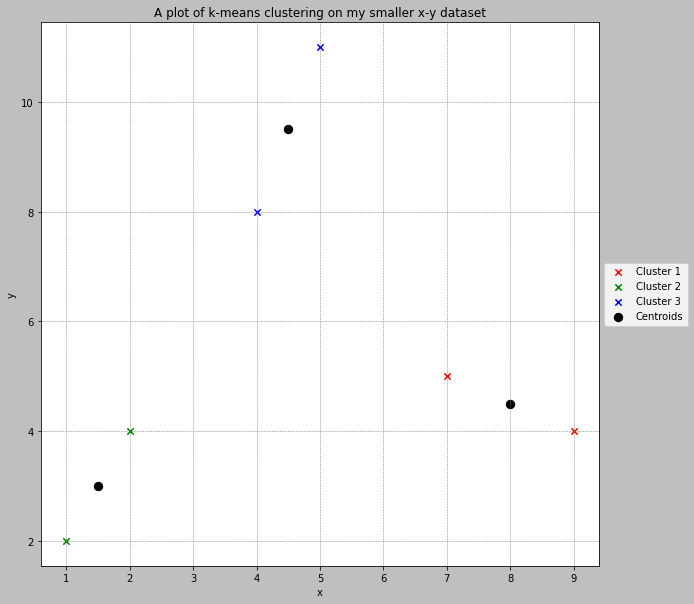

In [7]:
kmeans = KMeans(n_clusters= 3)

label = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]

plt.scatter(filtered_label0[:,0], filtered_label0[:,1], color = 'red',
            marker = 'x', s = 40, label = 'Cluster 1')
plt.scatter(filtered_label1[:,0], filtered_label1[:,1], color = 'green',
            marker = 'x', s = 40, label = 'Cluster 2')
plt.scatter(filtered_label2[:,0], filtered_label2[:,1], color = 'blue',
            marker = 'x', s = 40, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color = 'black', marker = 'o', s = 70, label = 'Centroids')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('x')
plt.ylabel('y')
plt.title('A plot of k-means clustering on my smaller x-y dataset')
plt.show()

## Creating 3: Creating a test harness <a class="anchor" id="third-bullet"></a>

This is a small test harness that verifies whether the final cluster centroids arrived at by my algorithm are the same as the ones that sklearn obtains.

In [8]:
def test_cluster_centers():
    rows = 2
    columns = 4
    mylist = []
    for j in range(columns):
        for i in range(rows):
            mylist.append(centroids[i][j],)
    
    sklist = []
    for j in range(rows):
        for i in range(columns):
            sklist.append(kmeans2.cluster_centers_.tolist()[i][j],)
            
    mylist = [round(num, 5) for num in mylist]
    sklist = [round(num, 5) for num in sklist]
            
    print('These are the values for the coordinates of our centroids: '
          + str(sorted(mylist)))
    print("These are the values for the coordinates of sklearn's centroids: "
          + str(sorted(sklist)))
        
    if sorted(sklist) == sorted(mylist):
        print('Cluster center test: Passed')
    else:
        print('Cluster center test: Failed')

This tests the output of the implementation and thus tests the entire algorithm, meaning it has a wide coverage and can be considered an integration test. As such, a positive output from the test is dependent on every aspect of the algorithm functioning as is intended.

## Section 4: Implementing k-means clustering in Python <a class="anchor" id="fourth-bullet"></a>

I use the elbow method here to determine what the best value for k is when using my larger dataset. It can be seen from the plot below that the elbow (the point after which the line follows a roughly linear decline) is at k = 4, so this is the value chosen for the implementation below.

C:\Users\Brudalaxe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


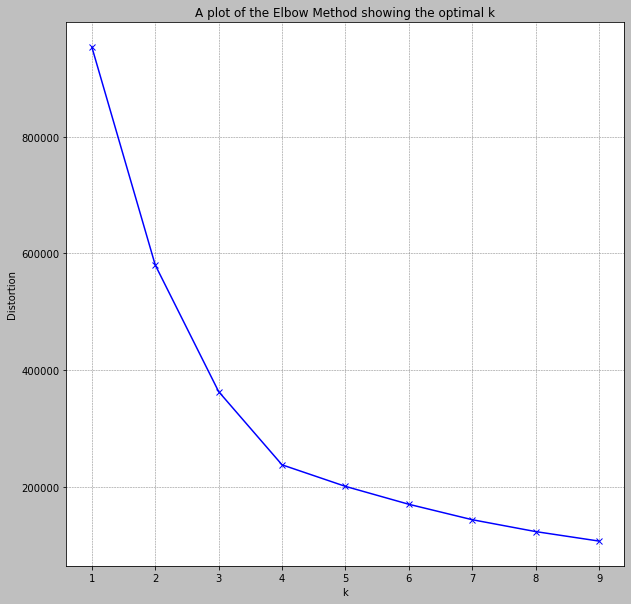

In [9]:
ElbowMethod(data)

The main steps of the algorithm are:

**Step 1**: Randomly create the centroids.

**Step 2**: Calculate the Euclidean distance of each data point from the centroids generated above.

**Step 3**: Assign each data point a cluster based on the Euclidean distance from the centroids.

**Step 4**: Calculate the new cluster centroids.

We then repeat steps 2-4 until convergence.

In [10]:
start_time = time.time()

In [11]:
def MyKMeans(data, k):
    
    # Step 1: Randomly create the centroids.
    
    initialcentroids = np.random.randint(100, size=(k, 2))
    
    # Repeat steps 2-4 until convergence.
    
    while True:
        
        # Step 2: Calculate the Euclidean distance of each data point from the centroids generated above.
        
        EucDist = np.linalg.norm(data - initialcentroids[0,:],axis=1).reshape(-1,1)
        
        for j in range(1, k):
            EucDist = np.append(EucDist, np.linalg.norm(data
                                - initialcentroids[j,:],axis=1).reshape(-1,1),axis=1)
        
        # Step 3: Assign each data point a cluster based on the Euclidean distance from the centroids.
        
        clusters = np.argmin(EucDist,axis=1)
        
        # Step 4: Calculate the new cluster centroids.
        
        centroids = np.array([data[clusters == i].mean(0)
                                for i in range(k)])
        
        # Check for convergence.
        
        if np.all(initialcentroids == centroids):
            break
        initialcentroids = centroids
        
    print(centroids)
    return centroids.T, clusters, initialcentroids

Applying the function to our dataset with k = 4:

In [12]:
centroids, clusters, init = MyKMeans(data, 4)

[[26.28571429 25.62406015]
 [24.32258065 72.76129032]
 [72.56725146 75.69005848]
 [73.41843972 22.87234043]]


In [13]:
print("--- %.4fs seconds ---" % (time.time() - start_time))

--- 0.0164s seconds ---


Here I implement sklearn's KMeans algorithm on the dataset with 4 clusters to compare the resulting centroids and the time taken to compute.

In [14]:
start_time2 = time.time()
kmeans2 = KMeans(n_clusters = 4).fit(data)
kmeans2.labels_
kmeans2.predict(init)
print(kmeans2.cluster_centers_)
print("--- %.4fs seconds ---" % (time.time() - start_time2))

[[73.41843972 22.87234043]
 [72.56725146 75.69005848]
 [26.28571429 25.62406015]
 [24.32258065 72.76129032]]
--- 0.0337s seconds ---


Here we can apply the test harness to verify that our implementation functions as desired.

In [15]:
test_cluster_centers()

These are the values for the coordinates of our centroids: [22.87234, 24.32258, 25.62406, 26.28571, 72.56725, 72.76129, 73.41844, 75.69006]
These are the values for the coordinates of sklearn's centroids: [22.87234, 24.32258, 25.62406, 26.28571, 72.56725, 72.76129, 73.41844, 75.69006]
Cluster center test: Passed


We can see that the cluster centers that our implementation arrived at are the same as the ones obtained by sklearn, verifying to us that our algorithm works.

There are some assumptions and limitations made by the algorithm that are inherent to k-means clustering algorithms:

**1. The variance of the distribution of each variable is assumed to be spherical**

This can cause issues when the data follows a unique non-spherical pattern. For example, if your data is organised in a ring around a smaller spherical cluster (like a 2D image of Saturn), k-means will incorrectly classify the clusters in the scenario, whereas it's obvious to the human eye that these can be classified as two cluster (the ring and the sphere).

**2. Local minima can cause the algorithm to get stuck**

Depending on how the centroids have been initialised (often this is done in a random fashion), the clustering can get stuck on local minima such that it will result in cluster centers that are different from those expected. The success of overcoming the influence of local minima is also dependent on the data itself and how it is structured - if there are obvious, separate clusters then the likelihood of the clustering being affected by local minima will be less. In my case, the dataset I used has no obvious clusters and it took a few runs through to obtain results in agreement with sklearn.

**3. Clustering uniform data**

If you have a dataset that is uniform, k-means can still cluster the data even though there isn't any inherent underlying pattern in the data. So k-means won't inform the user when data is not clustered, and thus can cause issues later on if the results are taken to be true. The dataset I've used falls victim to this slightly, as although the data is randomly generated, there is a high likelihood that the data will be fairly uniform.

**4. Sensitivity to rescaling**

Extra care has to be taken when rescaling datasets for k-means clustering as this can impact the results of the algorithm drastically. Depending on the variance of the clusters and the scale of the axes, k-means can incorrectly classify clusters as it can't distinguish when there is high proportionality in the data, resulting in clusters that consist of widely differing variances in the spread of the data within them.

The complexity of an algorithm is a measure of the amount of time required by an algorithm for an input of a given size.

The for loop in my algorithm:

    for j in range(1, k):
            EucDist = np.append(EucDist, np.linalg.norm(data - initialcentroids[j,:],axis=1).reshape(-1,1),axis=1)

has an upper bound of k (the number of clusters) and the calculation is so minor and small that this adds no real amount to the complexity. I measured the time taken to iterate over this loop and it takes 0.000...s (to 10 decimal places), so even when k = 50, the amount of time this loop takes to iterate is negligible.

The while loop in my algorithm:

    while True:
        EucDist = np.linalg.norm(data - initialcentroids[0,:],axis=1).reshape(-1,1)
        
        for j in range(1, k):
            EucDist = np.append(EucDist, np.linalg.norm(data - initialcentroids[j,:],axis=1).reshape(-1,1),axis=1)
        
        clusters = np.argmin(EucDist,axis=1)
        
        centroids = np.array([data[clusters == i].mean(0)
                                for i in range(k)])

        if np.all(initialcentroids == centroids):
            break
        initialcentroids = centroids

is a much heavier computation and the time for each iteration can be measured to 5 decimal places for different k is k = 1 (0.00000s), 2 (0.00299s), 3 (0.00315s), 4 (0.00399s), 5 (0.00402s), 6 (0.00499s), 7 (0.00599s). These values are obviously dependent on the machine that the algorithm is running on. These values will obviously also change with the size of the dataset as well.

As for the complexity of the whole algorithm, there appears to be a floor at around k = 4, below which the computational time doesn't change (sitting at around 0.0480s). At k = 10 (0.0620s), and at k = 20 (0.0629s). It can be seen that the total time taken for the algorithm to complete when getting to larger values of k remains relatively unchanged.

When comparing the time for my algorithm to complete (0.0467s) with sklearn's KMeans algorithm (0.0289s), it can be seen that there is a bit of a difference, which tells me that my algorithm is pretty well streamlined, though there are obviously ways it could be improved: through the use of classes, taking out any unnecessary print/call lines etc.

## Section 5: Visualising the results <a class="anchor" id="fifth-bullet"></a>

Here is a plot of the larger dataset, that was randomly generated using NumPy, and was used for the majority of the calculations in the notebook.

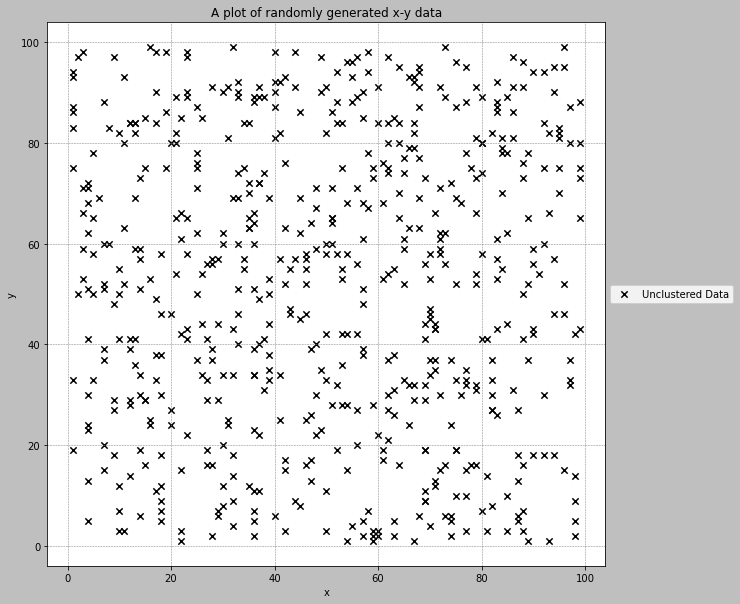

In [16]:
plt.scatter(data[:, 0], data[:, 1], marker = 'x', s = 40,
            c = 'black', label = 'Unclustered Data')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A plot of randomly generated x-y data')
plt.show()

Here is a plot visualising the outcome of my k-means clustering algorithm on the randomly generated dataset, colour coordinated according to the cluster.

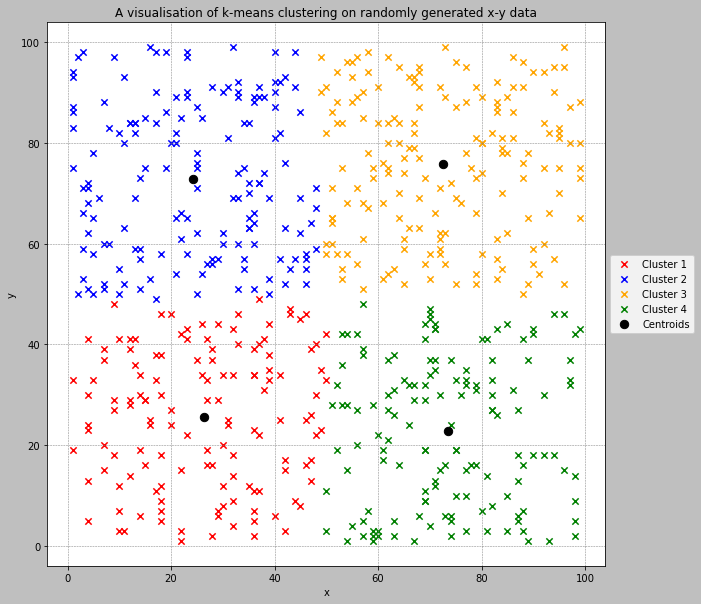

In [17]:
filtered_label0 = data[clusters == 0]
filtered_label1 = data[clusters == 1]
filtered_label2 = data[clusters == 2]
filtered_label3 = data[clusters == 3]

plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c='red', 
            marker = 'x', s=40, cmap='rainbow', label = 'Cluster 1')
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1], c='blue', 
            marker = 'x', s=40, cmap='rainbow', label = 'Cluster 2')
plt.scatter(filtered_label2[:, 0], filtered_label2[:, 1], c='orange', 
            marker = 'x', s=40, cmap='rainbow', label = 'Cluster 3')
plt.scatter(filtered_label3[:, 0], filtered_label3[:, 1], c='green', 
            marker = 'x', s=40, cmap='rainbow', label = 'Cluster 4')
plt.scatter(centroids[0, :], centroids[1, :], s = 70, marker = 'o', 
            c = 'black', label = 'Centroids')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A visualisation of k-means clustering on randomly generated x-y data')
plt.show()